# The Spark Foundation
### Data Science and Business Analytics
# Task 2: Prediction using Unsupervised Machine Learning
### Objective: Predict the optimum number of clusters and represent it visually.

# Author : Archita Dhande

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [4]:
iris = pd.read_csv('D:\Archita\The Sparks Foundation\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Exploratory Data Analysis


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

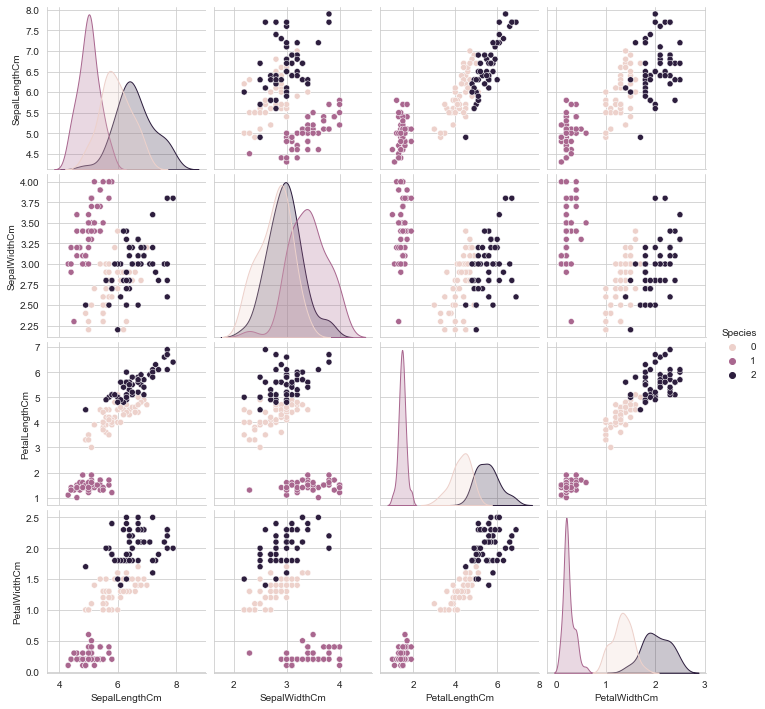

In [41]:
sns.pairplot(iris.iloc[:,1:],hue = 'Species')
plt.show()

In [42]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

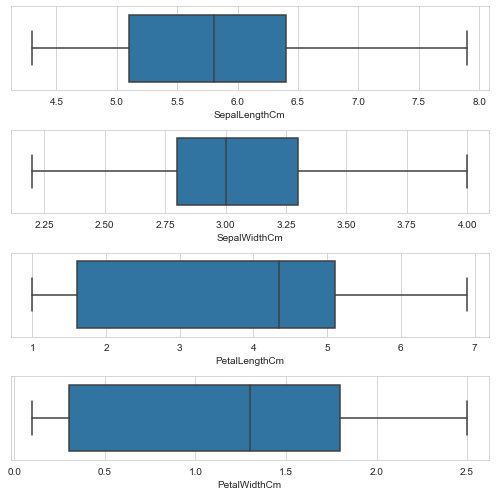

In [43]:
fig,axs = plt.subplots(4,figsize = (7,7))
plt1 = sns.boxplot(iris['SepalLengthCm'],ax = axs[0])
plt2 = sns.boxplot(iris['SepalWidthCm'],ax = axs[1])
plt3 = sns.boxplot(iris['PetalLengthCm'],ax = axs[2])
plt4 = sns.boxplot(iris['PetalWidthCm'],ax = axs[3])
plt.tight_layout()


#### We can see that there are some outliers in SepalWidthCm, this can affect our models performace since we are working with KMeans (a distance based clustering algorithm). Let's go ahead and winsorize them

In [45]:
from scipy.stats.mstats import winsorize
winsorize(iris.SepalWidthCm,limits=(1/150,3/150),inplace=True)

masked_array(data=[3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7,
                   3.4, 3. , 3. , 4. , 4. , 3.9, 3.5, 3.8, 3.8, 3.4, 3.7,
                   3.6, 3.3, 3.4, 3. , 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4. ,
                   4. , 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3, 3.2, 3.5,
                   3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8,
                   2.8, 3.3, 2.4, 2.9, 2.7, 2.2, 3. , 2.2, 2.9, 2.9, 3.1,
                   3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
                   3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3,
                   3. , 2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5,
                   2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6,
                   3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6, 2.2, 3.2,
                   2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8,
                   2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
                   3.2, 3.3, 3. , 2.5,

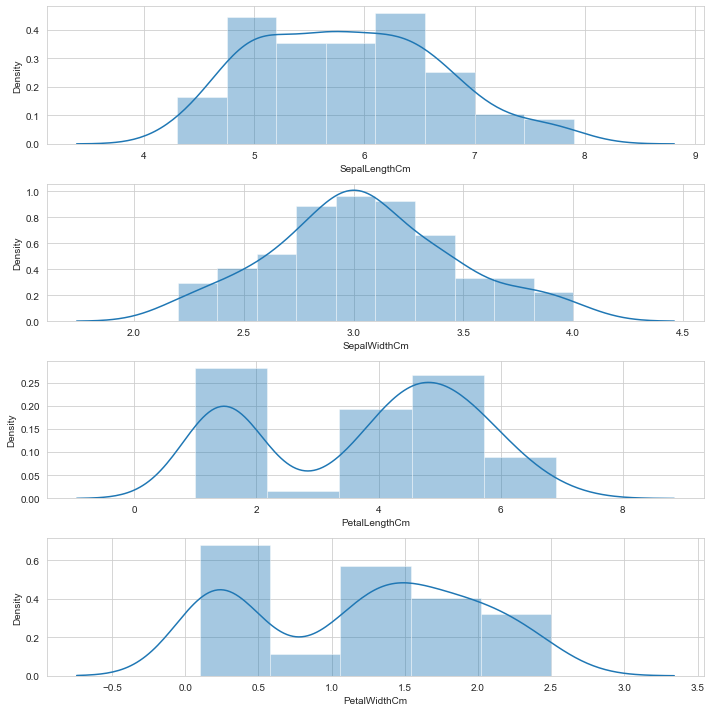

In [53]:
fig,axs = plt.subplots(4,figsize = (10,10))
plt1 = sns.distplot(iris['SepalLengthCm'],ax = axs[0])
plt2 = sns.distplot(iris['SepalWidthCm'],ax = axs[1])
plt3 = sns.distplot(iris['PetalLengthCm'],ax = axs[2])
plt4 = sns.distplot(iris['PetalWidthCm'],ax = axs[3])
plt.tight_layout()

#### Evaluating Heat Map


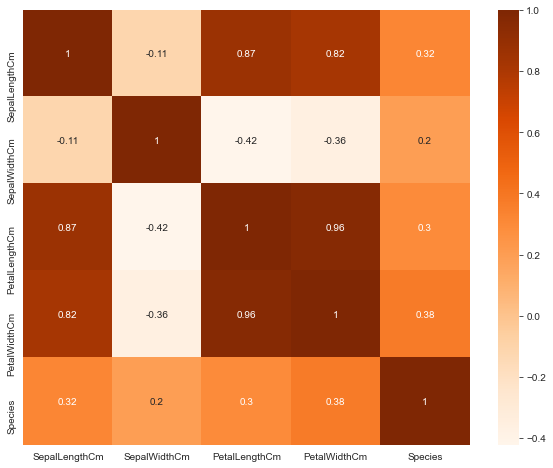

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.iloc[:,1:].corr(),annot=True,cmap='Oranges')
plt.show()

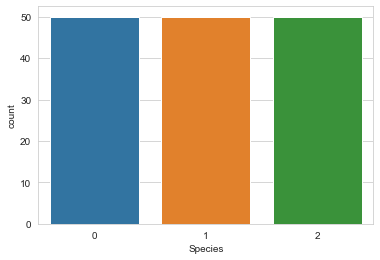

In [56]:
# lets check if we are dealing with a balanced dataset
sns.countplot(iris.Species)
plt.show()

#### Data Preprocessing

In [62]:
x = iris.iloc[:,1:5]
y = iris.Species

In [63]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

#### Model Creation

In [66]:
from sklearn.cluster import KMeans

kmeans_kwargs = {'init':'k-means++','n_init':10,'max_iter':300,'random_state':42}
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,**kmeans_kwargs)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

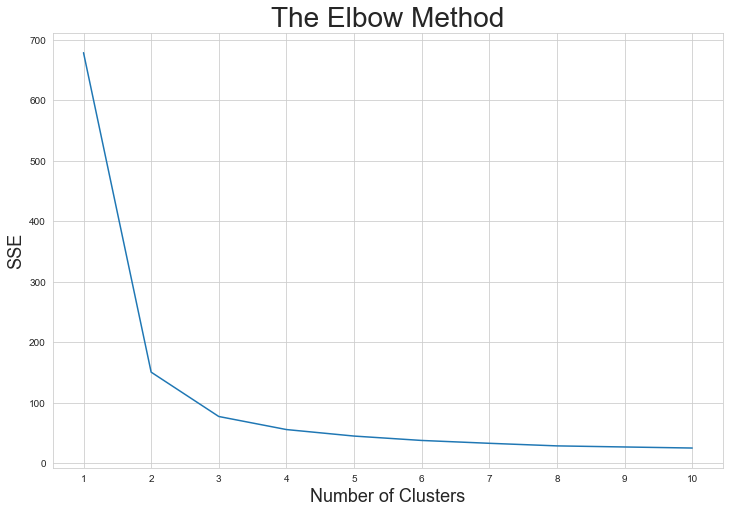

In [67]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title('The Elbow Method',size=28)
plt.xlabel('Number of Clusters',size=18)
plt.ylabel('SSE',size=18)
plt.show()

#### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. This is when within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
### Hence, Optimum Cluster = 3
#### This is correct! We have 3 species of Iris - Setosa,Versicolor,Virginica and the Elbow Method helped us find this optimum number correctly

#### Model Training

In [70]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [71]:
print(iris_k_mean_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [72]:
print(iris_k_mean_model.cluster_centers_)

[[5.006      3.404      1.464      0.244     ]
 [5.9016129  2.7516129  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


#### Visualizing the model cluster

Text(0.5, 1.0, "Model's Classification")

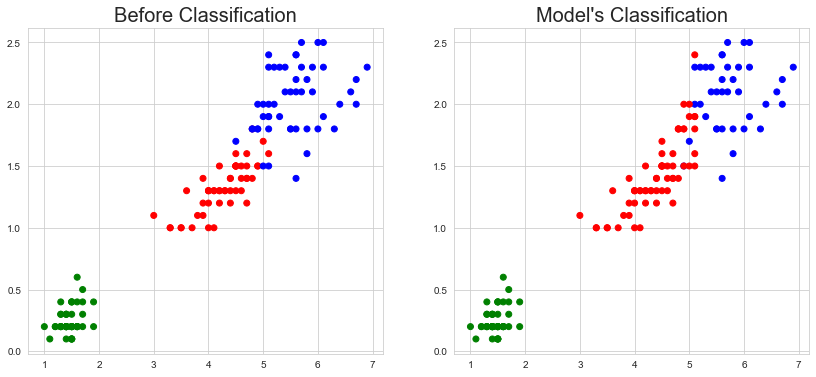

In [74]:
plt.figure(figsize=(14,6))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[y])
plt.title('Before Classification', size=20)

plt.subplot(1, 2, 2)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[predictedY])
plt.title("Model's Classification", size=20)

#### Calculating Accuracy 

In [76]:
import sklearn.metrics as sm
sm.accuracy_score(predictedY, y)

0.8933333333333333

### Hence,Task 2 completed.
#### Thank you!